In [1]:
%matplotlib inline

In [2]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.misc.pilutil import imread,imshow

In [3]:
from IPython.display import clear_output
import cv2

In [4]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [5]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [6]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


Age:  MIDDLE


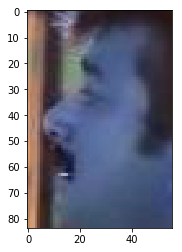

In [7]:
i = random.choice(train.index)

img_name = train.ID[i]
img = cv2.imread(os.path.join('./Train', img_name))

print('Age: ', train.Class[i])
plt.imshow(img)
plt.show()

In [8]:
from skimage.transform import rescale, resize

temp = []
count = 0
for img_name in train.ID:
    img_path = os.path.join('./Train/', img_name)
    img = Image.open(img_path).convert('LA')
    img = img.resize((32, 32))
    temp.append(img)
    clear_output()
    count+=1
    print(count)

train_x = np.stack(temp)

19906


In [9]:
temp = []
count = 0
for img_name in test.ID:
    img_path = os.path.join('./Test/', img_name)
    img = Image.open(img_path).convert('LA')
    img = img.resize((32, 32))
    temp.append(img)
    clear_output()
    count+=1
    print(count)

test_x = np.stack(temp)

6636


In [10]:
train_x = train_x / 255.
test_x = test_x / 255.

In [11]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [12]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [13]:
print(train_y)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [14]:
input_num_units = (32, 32, 2)
hidden_num_units = 500
output_num_units = 3

In [15]:
epochs = 100
batch_size = 56

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [17]:
model = Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units, activation='relu'),
    Dense(units=hidden_num_units, activation='relu'),
    Dense(units=hidden_num_units, activation='relu'),
    Dense(units=output_num_units, activation='softmax'),
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1024500   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1503      
Total params: 1,527,003
Trainable params: 1,527,003
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 8s 522us/step - loss: 0.9395 - acc: 0.5439 - val_loss: 0.9492 - val_acc: 0.5439
Epoch 2/100
15924/15924 [==============================] - 8s 488us/step - loss: 0.9099 - acc: 0.5630 - val_loss: 0.9352 - val_acc: 0.4970
Epoch 3/100
15924/15924 [==============================] - 8s 483us/step - loss: 0.8916 - acc: 0.5777 - val_loss: 0.8869 - val_acc: 0.5932
Epoch 4/100
15924/15924 [==============================] - 8s 504us/step - loss: 0.8822 - acc: 0.5808 - val_loss: 0.8835 - val_acc: 0.5660
Epoch 5/100
15924/15924 [==============================] - 9s 536us/step - loss: 0.8740 - acc: 0.5836 - val_loss: 0.8732 - val_acc: 0.5748
Epoch 6/100
15924/15924 [==============================] - 9s 585us/step - loss: 0.8664 - acc: 0.5861 - val_loss: 0.9367 - val_acc: 0.5131
Epoch 7/100
15924/15924 [==============================] - 9s 546us/step - loss: 0.8612 - acc: 0.5919 - val_loss: 0.9

15924/15924 [==============================] - 9s 535us/step - loss: 0.7486 - acc: 0.6584 - val_loss: 0.8380 - val_acc: 0.6138
Epoch 60/100
15924/15924 [==============================] - 9s 566us/step - loss: 0.7468 - acc: 0.6591 - val_loss: 0.9598 - val_acc: 0.5615
Epoch 61/100
15924/15924 [==============================] - 9s 573us/step - loss: 0.7477 - acc: 0.6566 - val_loss: 0.7939 - val_acc: 0.6351
Epoch 62/100
15924/15924 [==============================] - 10s 601us/step - loss: 0.7466 - acc: 0.6572 - val_loss: 0.8258 - val_acc: 0.5904
Epoch 63/100
15924/15924 [==============================] - 9s 567us/step - loss: 0.7436 - acc: 0.6588 - val_loss: 0.7892 - val_acc: 0.6308
Epoch 64/100
15924/15924 [==============================] - 9s 590us/step - loss: 0.7401 - acc: 0.6638 - val_loss: 0.9308 - val_acc: 0.5113
Epoch 65/100
15924/15924 [==============================] - 9s 590us/step - loss: 0.7436 - acc: 0.6638 - val_loss: 0.7768 - val_acc: 0.6429
Epoch 66/100
15924/15924 [======

In [21]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('sub01.csv', index=False)

C:\ProgramData\Anaconda3\envs\tensor1\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tensor1\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


3


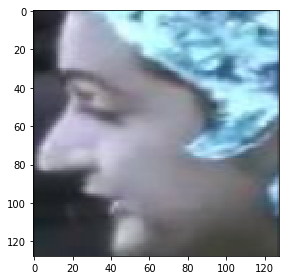

In [22]:
from skimage.io import imshow
i = random.choice(train.index)
img_name = train.ID[2]

img = cv2.imread(os.path.join('./Train', img_name))
#plt.imshow(img)
imshow(resize(img, (128,128)))
pred = model.predict_classes(train_x)
#print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))
print(len(set(pred)))
plt.show()